## Convolutional Neural Network (CNN)

- Convolutional Neural Network are used in Computer Vision

### Computer Vision Libraries in PyTorch
1. [`torchvision`](https://pytorch.org/vision/stable/index.html) - Base Domain Library for PyTorch Computer Vision
2. [`torchvision.datasets`](https://pytorch.org/vision/master/datasets.html) - Get data sets and data loading functions for Computer Vision
3. [`torchvision.models`](https://pytorch.org/vision/stable/models.html) - get pretrained computer vision model
4. [`torchvision.transforms`](https://pytorch.org/vision/0.9/transforms.html) - module that provides common image transformations for image preprocessing in computer vision tasks.
5. [`torchvision.transforms.ToTensor`](https://pytorch.org/vision/main/generated/torchvision.transforms.ToTensor.html) Convert a PIL Image or ndarray to tensor and scale the values accordingly.
6. `torch.utils.data.Dataset` -  Base dataset class for PyTorch.
7. `torch.utils.data.DataLoder` - Creates a Python iterable over a data

### Necessary Imports

In [1]:
# Import Pytorch
import torch
import torch.nn 

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import models
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import Visualization Tool (matplotlib)
import matplotlib.pyplot as plt

In [2]:
def get_version(fn):
    return fn.__version__

In [3]:
print(f"PyTorch Version: {get_version(torch)} \ntorchvision Version: {get_version(torchvision)}")

PyTorch Version: 2.5.1+cu124 
torchvision Version: 0.20.1+cu124


### Setting Device Agnostic

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'CPU'
device

'cuda'

## Getting Dataset

-  I'm going to use [`MNIST fashion dataset`](https://www.kaggle.com/datasets/zalando-research/fashionmnist) - Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of **60,000 examples and a test set of 10,000 examples.** Each example is a `28x28` grayscale image, associated with a label from 10 classes
-  [Fashion MNIST Github](https://github.com/zalandoresearch/fashion-mnist/tree/master)
-  Download the data and turn into data loader using [`torchvision.dataset.FashionMNIST`](https://pytorch.org/vision/0.19/generated/torchvision.datasets.FashionMNIST.html)


In [5]:
# Download the data and turn into data loader usisng `torchvision.dataset.FashionMNIST`
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data", # from where to download the data
    train = True, # download training data set
    download = True, # downloads the dataset from the internet and puts it in root directory
    transform = ToTensor(), # transform the data
    target_transform  = None # transform the labels
)
test_data = datasets.FashionMNIST(
    root = "data", # from where to download the data
    train = False, # download Testing data set
    download = True, # downloads the dataset from the internet and puts it in root directory
    transform = ToTensor(), # transform the data
    target_transform  = None # transform the labels
)

In [6]:
len(train_data), len(test_data)

(60000, 10000)

In [7]:
# see the first training example
image, label = train_data[0]
image, label # this is Ankle boot': 9

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [9]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
first_5_labels = train_data.targets[:5]
first_5_labels

tensor([9, 0, 0, 3, 0])

In [11]:
# Check the shape of our images
image.shape # [color_channel, height, width]

torch.Size([1, 28, 28])

In [12]:
print(f"Image Shape : {image.shape} --> [color_channel, height, width]")

Image Shape : torch.Size([1, 28, 28]) --> [color_channel, height, width]


### Setup Device Agnostic code

In [13]:
device = 'cuda' if torch.cuda.is_available else 'CPU'
device

'cuda'

## Visualizing our data

(-0.5, 27.5, 27.5, -0.5)

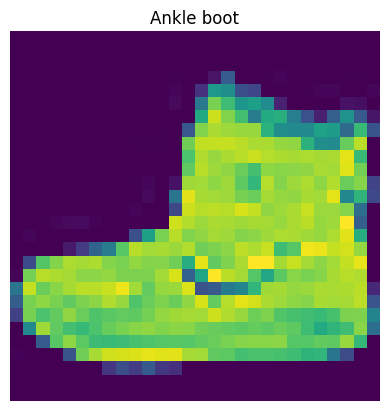

In [14]:
import matplotlib.pyplot as plt
image, label = train_data[0]
# print(f"Image Shape: {image.shape}")
plt.title(train_data.classes[label])
plt.imshow(image.reshape(28,28,1))
plt.axis(False)

(-0.5, 27.5, 27.5, -0.5)

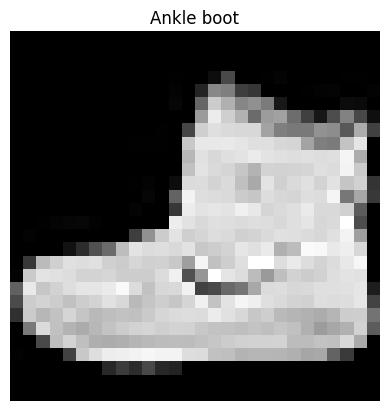

In [15]:
# plotting this into grey scale image
plt.title(train_data.classes[label])
plt.imshow(image.reshape(28,28,1), cmap = "gray")
plt.axis(False)

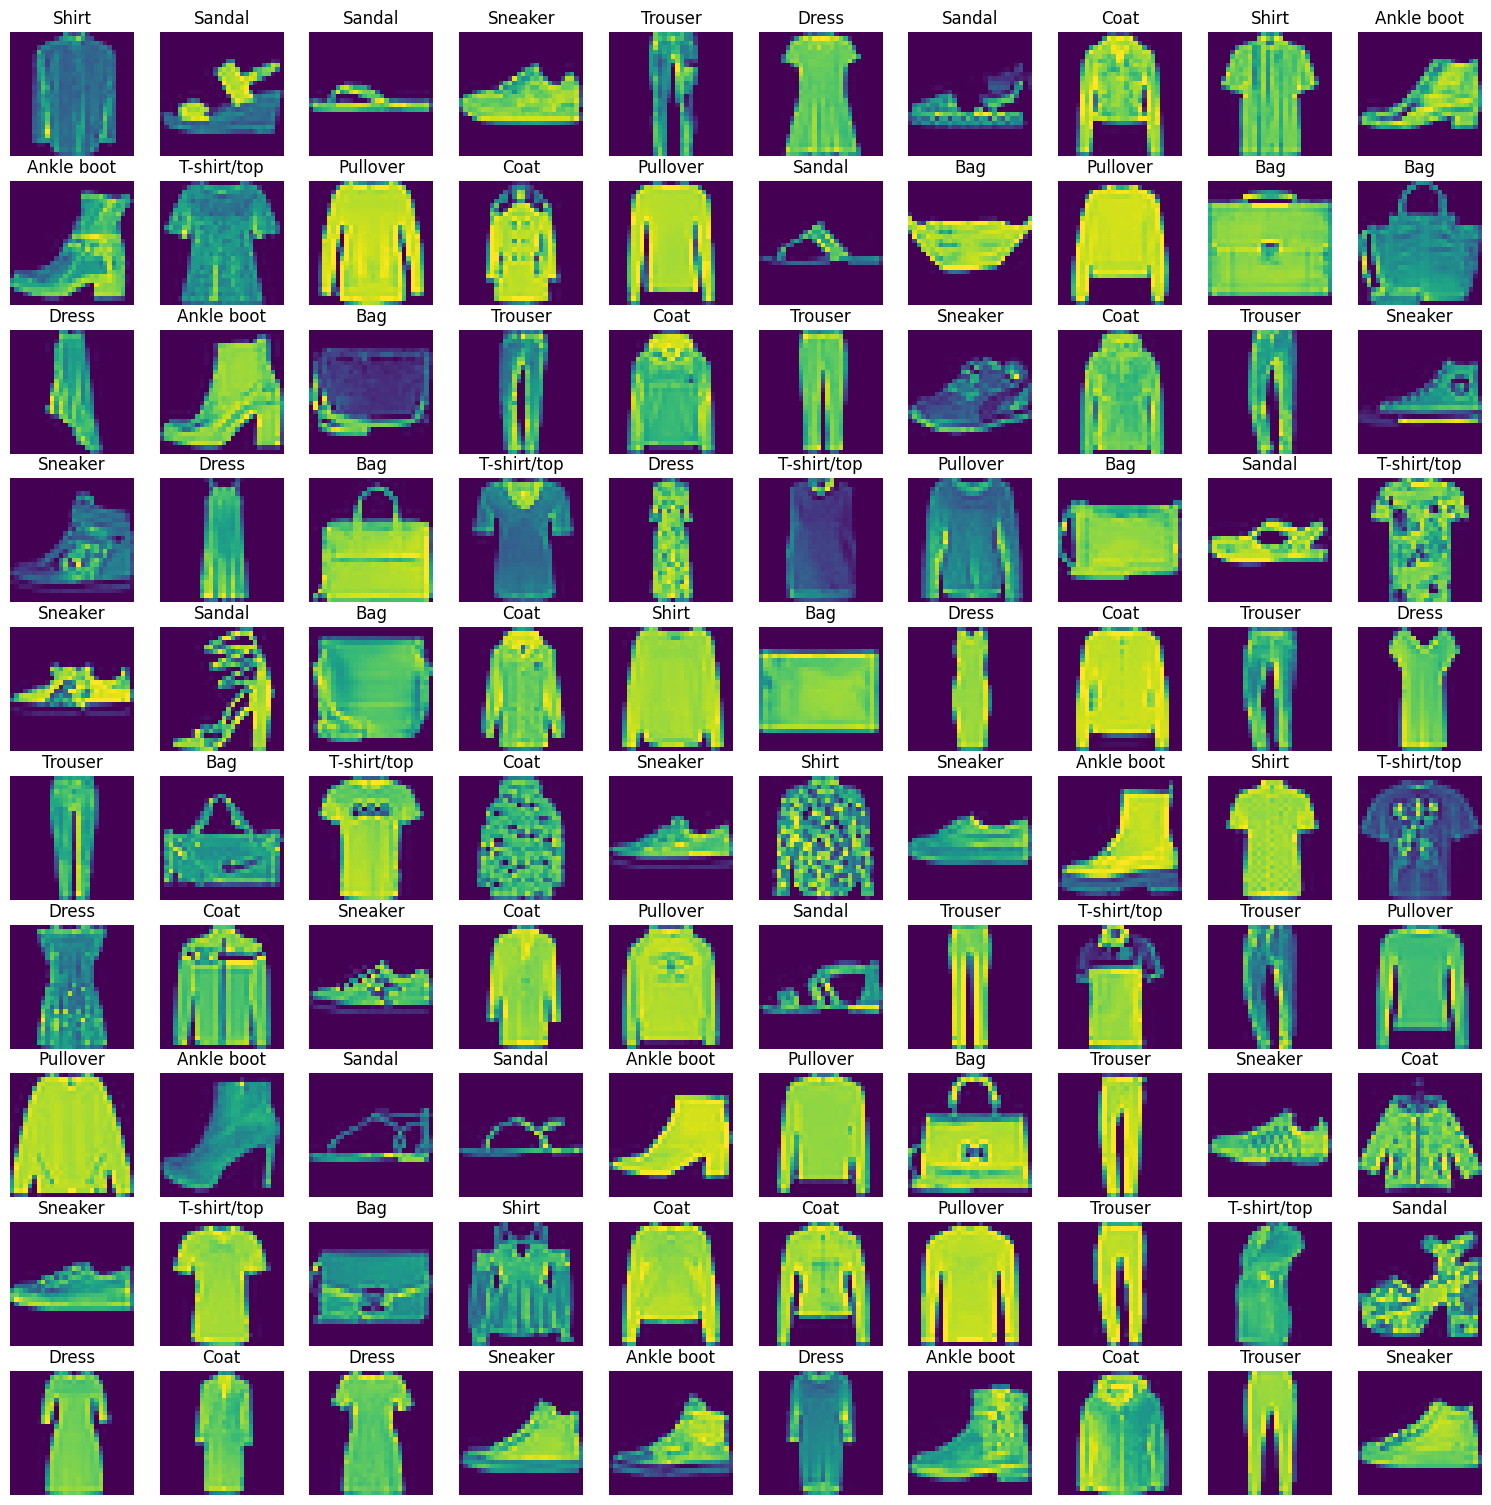

In [16]:
# Plot Random images
fig = plt.figure(figsize = (19,19))
row, col = 10, 10
for i in range(1, row*col + 1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(row, col, i)
    plt.imshow(img.reshape(28,28,1))
    plt.title(train_data.classes[label])
    plt.axis(False)

## Prepare DataLoader and Concept of Mini - Batches

DataLoader turns our data into Python iterable.

More specificaly, we want to turn our data into batches (or mini batches).

### Why to do this?

1. It is computationally efficient, as in our computer hardware may not be able to look (store in memory) at 60,000 images in one hit. So we break it down to 32 images at a time (batch size of 32). 32 = common batch size
2. It gives our neural network more chances to update its gradient per epoch.

In [17]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [186]:
# import DataLoader
from torch.utils.data import DataLoader

# Define Batch size
BATCH_SIZE = 32

# Make mini-batches for train data
train_data_loader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

# Make mini-batches for test data
test_data_loader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

In [19]:
print(f"Now we have {len(train_data_loader)} batches each containing {BATCH_SIZE} Images")
print(f"This means, we have total of {len(train_data_loader)} X {BATCH_SIZE} ({len(train_data_loader) * BATCH_SIZE}) Images samples in training data")

Now we have 1875 batches each containing 32 Images
This means, we have total of 1875 X 32 (60000) Images samples in training data


In [20]:
len(train_data_loader), len(test_data_loader)

(1875, 313)

In [21]:
int(len(train_data) / BATCH_SIZE)

1875

In [22]:
# Let's Check What we've created
print(f"1. DataLoader : {train_data_loader}, {test_data_loader}")
print("")
print(f"2. Length of Train Mini Batch = {len(train_data_loader)}")
print(f"3. Length of Test Mini Batch = {len(test_data_loader)}")

1. DataLoader : <torch.utils.data.dataloader.DataLoader object at 0x0000022E0FD20EB0>, <torch.utils.data.dataloader.DataLoader object at 0x0000022E0FB6A1D0>

2. Length of Train Mini Batch = 1875
3. Length of Test Mini Batch = 313


In [23]:
# Check what's inside our mini batches
train_features_batch, train_label_batch = next(iter(train_data_loader))
train_features_batch.shape, train_label_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Name: Shirt, Label: 6
Image Size: torch.Size([1, 28, 28])


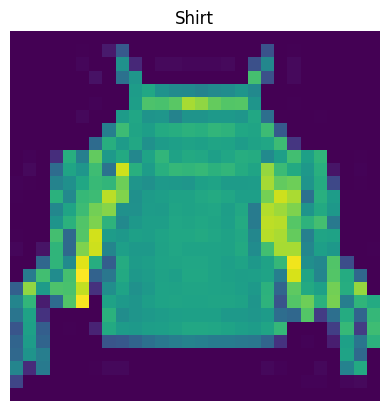

In [24]:
# Show a sample
random_idx = torch.randint(0, len(train_features_batch), size = [1]).item()
image, label = train_features_batch[random_idx], train_label_batch[random_idx]
plt.imshow(image.reshape(28,28,1))
plt.title(class_names[label])
plt.axis(False)
print(f"Image Name: {class_names[label]}, Label: {label}")
print(f"Image Size: {img.shape}")

## 3. Model 0: Build a baseline model
Data loaded and prepared!

Time to build a baseline model by subclassing `nn.Module`.

**A baseline model is one of the simplest models you can imagine.**

You use the baseline as a starting point and try to improve upon it with subsequent, more complicated models.

### What is `nn.Flatten()`
`nn.Flatten()` reshapes multi-dimensional tensors into a flat vector while preserving the batch dimension, typically for transitioning from convolutional layers to fully connected layers.

In [25]:
import torch.nn as nn

In [26]:
# Example of `nn.Flatten()`
X = torch.arange(1, 26).reshape(1, 5, 5)
X

tensor([[[ 1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10],
         [11, 12, 13, 14, 15],
         [16, 17, 18, 19, 20],
         [21, 22, 23, 24, 25]]])

In [27]:
# flatten
flatten_tool = nn.Flatten()
flatten_X = flatten_tool(X)
flatten_X, flatten_X.shape

(tensor([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
          19, 20, 21, 22, 23, 24, 25]]),
 torch.Size([1, 25]))

In [28]:
# cretae a flatten Layer for our Model
flatten_model = nn.Flatten()
X = train_features_batch[0]
output = flatten_model(X)
# printing what's happening
print(f"Shape Before Flattening: {X.shape}")
print(f"Shape After Flattening: {output.shape}")

Shape Before Flattening: torch.Size([1, 28, 28])
Shape After Flattening: torch.Size([1, 784])


In [29]:
class FashionMNISTModelV0(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_unit_shape: int,
                output_shape: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit_shape),
            nn.Linear(hidden_unit_shape, hidden_unit_shape),
            nn.Linear(hidden_unit_shape, output_shape),
        )
    def forward(self, X):
        return self.model(X)
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(784, # 28 X 28
                           8,
                           10)

In [30]:
model_0

FashionMNISTModelV0(
  (model): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [31]:
# dummy_x =  torch.rand(1, 1, 28, 28).to(device)
# model_0(dummy_x), model_0(dummy_x).shape

## Setting up Loss function, Optimizer and evaluation metrics 💫

1. **Loss Function :** `nn.CrossEntropyLoss()` as we are working with Multi class classification dataset
2. **Optimizer :** `torch.optim.SGD()` or `torch.optim.Adam()`
3. **Accuracy :** `torchmetric.Accuracy`

In [32]:
from torchmetrics import Accuracy

In [33]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.01)
acc_fn = Accuracy(task="multiclass", num_classes=10)

## Creating a functions to time our experiments

In [34]:
from timeit import default_timer as timer

def getRunTime(start : float, end: float, device : torch.device):
    """ Prints the time taken to execulte a specific code block."""
    result = end - start
    print(f"Time of Execution on Device {device} is : {result:.3f} sec")
    return result

## Creating a training loop and training a model on batches of data

1. Loop through epochs.
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss **per batch**
4. Print out what's happening
5. time it all (for fun).


In [35]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-----------------")

    # train loss:
    train_loss = 0
    
    # add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_data_loader):

        model_0.train()
        # 1. Forward pass
        y_preds = model_0(X)
        # 2. Calculate loss
        loss = loss_fn(y_preds, y)
        train_loss += loss # loss per batch
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Loop at {batch * len(X)} / {len(train_data_loader.dataset)} samples")

    # divide total train loss by length of train data loader
    train_loss /= len(train_data_loader)

    # Testing Loop
    test_loss, test_acc = 0, 0

    model_0.eval()
    with torch.inference_mode():
        for X, y in  test_data_loader:
            # 1. Forward pass
            test_pred = model_0(X)
            # 2. Calculate Loss and accuracy
            loss_test = loss_fn(test_pred, y)
            acc_test = acc_fn(test_pred, y)
            test_loss += loss_test
            test_acc += acc_test

        # calculate the test loss (avg per batch)
        test_loss /= len(test_data_loader)
        test_acc /= len(test_data_loader)

    # print what's happening
    print(f"\nTrain Loss: {train_loss} | Test Loss : {test_loss} | Test Acc : {test_acc}")

# calculating training time
train_time_end_on_cpu = timer()
time_taken = getRunTime(train_time_start_on_cpu, 
                        train_time_end_on_cpu,
                        str(next(model_0.parameters()).device)
                       )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.5785385966300964 | Test Loss : 0.5178671479225159 | Test Acc : 0.8193889856338501
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.49880266189575195 | Test Loss : 0.5566388368606567 | Test Acc : 0.8092052936553955
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.48128780722618103 | Test Loss : 0.49646416306495667 | Test Acc : 0.833765983581543
Time of Execution on Device cpu is : 29.010 sec


## Making Function for Traning 

In [36]:
# import tqdm for progress bar
from tqdm.auto import tqdm

def train_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim):

    # set the seed and start the timer
    torch.manual_seed(42)
    train_time_start_on_cpu = timer()
    
    # Set the number of epochs
    epochs = 3
    
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch}\n-----------------")
    
        # train loss:
        train_loss = 0
        
        # add a loop to loop through the training batches
        for batch, (X, y) in enumerate(train_data_loader):
    
            model.train()
            # 1. Forward pass
            y_preds = model(X)
            # 2. Calculate loss
            loss = loss_fn(y_preds, y)
            train_loss += loss # loss per batch
            # 3. Optimizer zero grad
            optimizer.zero_grad()
            # 4. Loss backward
            loss.backward()
            # 5. Optimizer step
            optimizer.step()
    
            if batch % 400 == 0:
                print(f"Loop at {batch * len(X)} / {len(train_data_loader.dataset)} samples")
    
        # divide total train loss by length of train data loader
        train_loss /= len(train_data_loader)
        
        if batch % 400 == 0:
            print(f"Loop at {batch * len(X)} / {len(train_data_loader.dataset)} samples")

    # divide total train loss by length of train data loader
    train_loss /= len(train_data_loader)

## Making Predictions and get Model 0 results

In [37]:
import torchmetrics
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               acc_fn: torchmetrics.Accuracy):

    """
    Evaluates the model's performance on a given data loader.

    Args:
        model (torch.nn.Module): The model to evaluate.
        data_loader (torch.utils.data.DataLoader): DataLoader for evaluation.
        loss_fn (torch.nn.Module): Loss function for evaluation.
        acc_fn (torchmetrics.Accuracy): Accuracy metric from torchmetrics.

    Returns:
        dict: A dictionary containing loss, accuracy, and time taken.
    """
    
    start = timer()
    
    device = next(model.parameters()).device

    model.eval()
    with torch.inference_mode():
        loss, acc = 0, 0
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)

            test_preds = model(X)
            loss += loss_fn(test_preds, y).item()
            acc += acc_fn(test_preds, y).item()
            
    loss /= len(data_loader)
    acc /= len(data_loader)

    end = timer()

    time_taken =  end - start

    return {
        "Model_name" : model.__class__.__name__,
        "Test_Loss": loss,
        "Test_Accuracy": acc * 100,
        "Time_Taken": time_taken,
    }
    
    

In [38]:
model_0_results = eval_model(model_0, test_data_loader, loss_fn, acc_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV0',
 'Test_Loss': 0.4958894447968029,
 'Test_Accuracy': 83.39656549520767,
 'Time_Taken': 1.2044348999625072}

## Model 1: Let's Upgrade our Model by adding Non-Linearity to it

In [39]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_unit_shape: int,
                output_shape: int):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit_shape),
            nn.ReLU(),
            nn.Linear(hidden_unit_shape, hidden_unit_shape),
            nn.ReLU(),
            nn.Linear(hidden_unit_shape, output_shape),
        )
    def forward(self, X):
        return self.model(X)
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(784, # 28 X 28
                           8,
                           10)

In [40]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr = 0.01)
acc_fn = Accuracy(task="multiclass", num_classes=10)

In [41]:
train_model(model_1, train_data_loader, loss_fn, optimizer)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


In [42]:
model_1_results = eval_model(model_1, test_data_loader, loss_fn, acc_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV1',
 'Test_Loss': 0.5455648089750126,
 'Test_Accuracy': 81.26996805111821,
 'Time_Taken': 1.157625799998641}

In [43]:
# import tqdm for progress bar
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch}\n-----------------")

    # train loss:
    train_loss = 0
    
    # add a loop to loop through the training batches
    for batch, (X, y) in enumerate(train_data_loader):

        model_1.train()
        # 1. Forward pass
        y_preds = model_1(X)
        # 2. Calculate loss
        loss = loss_fn(y_preds, y)
        train_loss += loss # loss per batch
        # 3. Optimizer zero grad
        optimizer.zero_grad()
        # 4. Loss backward
        loss.backward()
        # 5. Optimizer step
        optimizer.step()

        if batch % 400 == 0:
            print(f"Loop at {batch * len(X)} / {len(train_data_loader.dataset)} samples")

    # divide total train loss by length of train data loader
    train_loss /= len(train_data_loader)

    # Testing Loop
    test_loss, test_acc = 0, 0

    model_1.eval()
    with torch.inference_mode():
        for X, y in  test_data_loader:
            # 1. Forward pass
            test_pred = model_1(X)
            # 2. Calculate Loss and accuracy
            loss_test = loss_fn(test_pred, y)
            acc_test = acc_fn(test_pred, y)
            test_loss += loss_test
            test_acc += acc_test

        # calculate the test loss (avg per batch)
        test_loss /= len(test_data_loader)
        test_acc /= len(test_data_loader)

    # print what's happening
    print(f"\nTrain Loss: {train_loss} | Test Loss : {test_loss} | Test Acc : {test_acc}")

# calculating training time
train_time_end_on_cpu = timer()
time_taken = getRunTime(train_time_start_on_cpu, 
                        train_time_end_on_cpu,
                        str(next(model_0.parameters()).device)
                       )

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.5045431852340698 | Test Loss : 0.5110769271850586 | Test Acc : 0.8254792094230652
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.4901575446128845 | Test Loss : 0.5163344740867615 | Test Acc : 0.8258786201477051
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples

Train Loss: 0.48514485359191895 | Test Loss : 0.5358558297157288 | Test Acc : 0.8185902833938599
Time of Execution on Device cpu is : 29.921 sec


## Model 2: Convolutional Neural Networks (CNN's)

1. CNN's are also know as `ConvoNets`
2. CNN's are know for their abilities to find the Patterns in Visual Data
3. Learn CNN from: https://poloclub.github.io/cnn-explainer/

In [44]:
class FashionMNISTModelV2(nn.Module):
    def __init__(self, input_shape, hidden_unit_shape, output_shape):
        super().__init__()
        self.convnet_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                     out_channels = hidden_unit_shape,
                     kernel_size = 3,
                      stride = 1,
                     padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_unit_shape,
                     out_channels = hidden_unit_shape,
                     kernel_size = 3,
                      stride = 1,
                     padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, 
                       stride  = 2,
                      padding = 0)
        )
        self.convnet_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels = hidden_unit_shape,
                     out_channels = hidden_unit_shape,
                     kernel_size = 3,
                      stride = 1,
                     padding = 0),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_unit_shape,
                     out_channels = hidden_unit_shape,
                     kernel_size = 3,
                      stride = 1,
                     padding = 0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, 
                       stride  = 2,
                      padding = 0)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_unit_shape * 4 * 4, # Because ther is a trick to find the input feature
                      output_shape)
        )
    def forward(self, X):
        X = self.convnet_layer_1(X)
        X = self.convnet_layer_2(X)
        X = self.classifier(X)
        return X

torch.manual_seed(42)
cnn_model = FashionMNISTModelV2(1, 10, 10)

## Stepping through `nn.Conv2d`

See the Documentation: https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [45]:
image = torch.rand(size = (32, 3, 64, 64)) # Batch size = 32, each image's size is 3 X 64 X 64 i.e. color_channel, height, width
test_image = image[0]

In [46]:
print(f"Image Shape: {image.shape}")
print(f"Test Image Shape: {test_image.shape}")

Image Shape: torch.Size([32, 3, 64, 64])
Test Image Shape: torch.Size([3, 64, 64])


## Creating Convolutional Layer

In [47]:
conv_layer = nn.Conv2d(in_channels = 3,
         out_channels = 10,
         kernel_size = 3,
         stride = 1,
         padding = 0)

In [48]:
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

## Stepping through `nn.MaxPool2d`

In [49]:
maxPool = nn.MaxPool2d(kernel_size = 2)
maxPool_output = maxPool(conv_output)
print(f"Original Test Image's Shape: {test_image.shape}")
print(f"Test Image's Shape After Convolutional Layer: {conv_output.shape}")
print(f"Test Image's Shape After Convolutional Layer and MaxPooling: {maxPool_output.shape}")

Original Test Image's Shape: torch.Size([3, 64, 64])
Test Image's Shape After Convolutional Layer: torch.Size([10, 62, 62])
Test Image's Shape After Convolutional Layer and MaxPooling: torch.Size([10, 31, 31])


In [50]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr = 0.0003)
acc_fn = Accuracy(task="multiclass", num_classes=10)

In [51]:
epochs = 5
for epoch in range(epochs):
    train_model(cnn_model, train_data_loader, loss_fn, optimizer)
    eval_model(cnn_model, test_data_loader, loss_fn, acc_fn)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


  0%|          | 0/313 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch 0
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 1
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples
Epoch 2
-----------------
Loop at 0 / 60000 samples
Loop at 12800 / 60000 samples
Loop at 25600 / 60000 samples
Loop at 38400 / 60000 samples
Loop at 51200 / 60000 samples


  0%|          | 0/313 [00:00<?, ?it/s]

In [52]:
model_2_results = eval_model(cnn_model, test_data_loader, loss_fn, acc_fn)
model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'Model_name': 'FashionMNISTModelV2',
 'Test_Loss': 0.37839329975862473,
 'Test_Accuracy': 86.29193290734824,
 'Time_Taken': 1.7003102999879047}

In [104]:
my_list = [1,2,3,4,5,6]
my_another_list = []
for i in my_list:
    my_another_list.append(i)
my_another_list_tensor = torch.tensor(my_another_list)
my_another_list_tensor

tensor([1, 2, 3, 4, 5, 6])

In [241]:
def make_predictions(model: torch.nn.Module, data: list):
    y_pred = []
    for sample, label in data:
        # Forward pass:
        y_pred_logits = model(sample)
        # transform it into prediction probabilities
        y_pred_logits = y_pred_logits.softmax(dim = -1)
        y_pred.append(y_pred_logits)
    return torch.cat(y_pred)

In [242]:
img, label = test_data[1]
img.shape, label

(torch.Size([1, 28, 28]), 2)

In [243]:
y_pred = make_predictions(cnn_model, list(test_data_loader)[:-1])

In [244]:
img, label = next(iter(test_data_loader))
actual_labels = (label[:32])
actual_labels

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8])

In [245]:
y_pred = torch.argmax(y_pred[:32], dim = 1)
y_pred

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8])

In [246]:
print(f"Accuracy: {round((actual_labels == y_pred).sum().item() / len(actual_labels) * 100)}%")

Accuracy: 88%


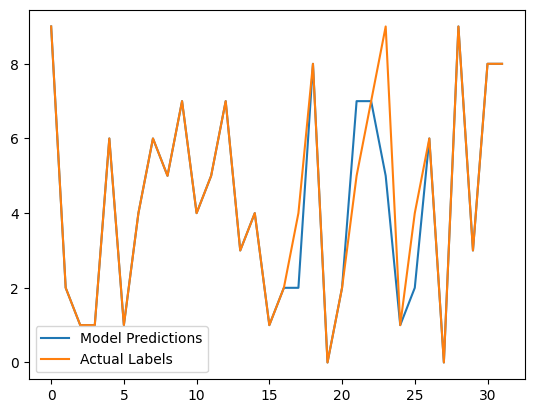

In [247]:
# Plotting the curve of Predictions and Labels
line1, = plt.plot(y_pred, label='Model Predictions')
line2, = plt.plot(actual_labels, label='Actual Labels')
plt.legend(handles=[line1, line2])

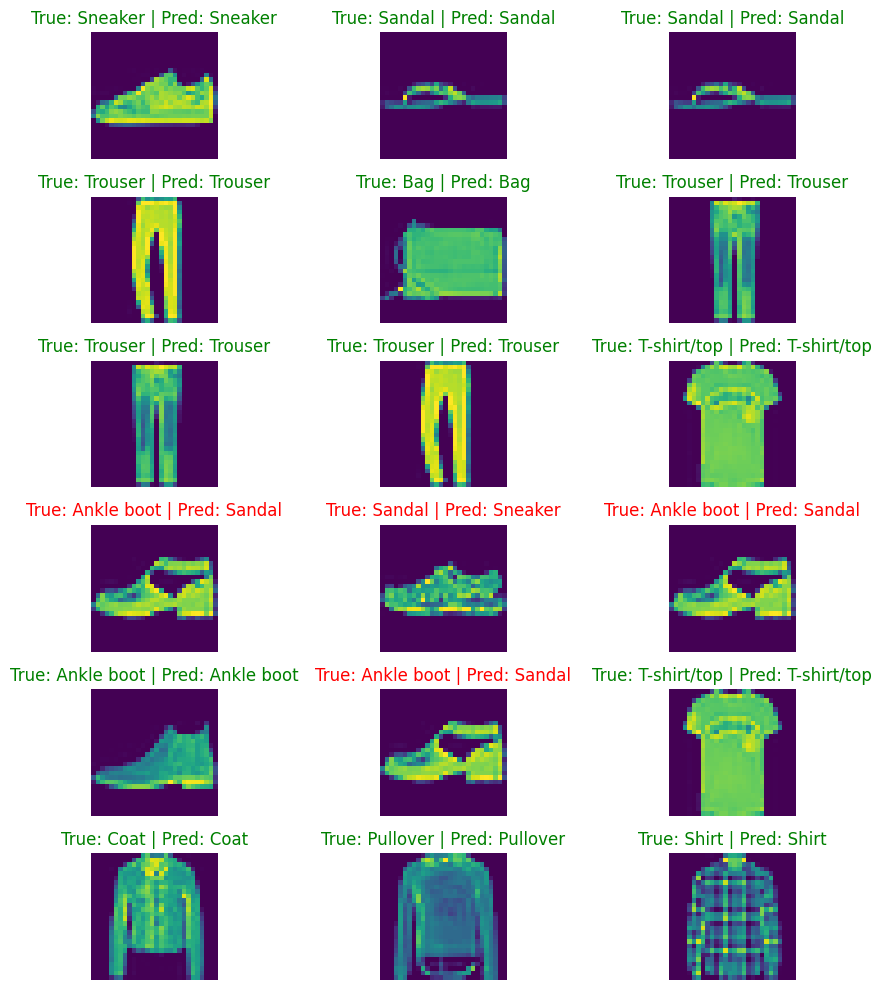

In [250]:
import torch
import matplotlib.pyplot as plt

# Function to plot MNIST images with true and predicted labels
def plot_mnist_predictions(images, true_labels, predicted_labels, num_images=10):
    """
    Visualizes MNIST images along with their true and predicted labels.
    """

    row, col = 6, 3
    plt.figure(figsize=(10, 10))  # Set the figure size
    for i in range(num_images):
        rand_idx = torch.randint(0, len(true_labels), size = [1]).item()
        plt.subplot(row, col, i+1)
        image = images[rand_idx].reshape(28,28,1)
        plt.imshow(image.cpu().numpy())  # Plot the image

        # Check if the prediction is correct
        color = "green" if true_labels[rand_idx] == predicted_labels[rand_idx] else "red"

        # Set the title with true and predicted labels
        plt.title(f"True: {class_names[true_labels[rand_idx]]} | Pred: {class_names[predicted_labels[rand_idx]]}", color=color)

        plt.axis("off")  # Hide axes for better visualization

    plt.tight_layout()
    plt.show()

# Retrieve a batch of test images and labels
test_images, test_labels = next(iter(test_data_loader))

# Visualize the images with true and predicted labels
plot_mnist_predictions(test_images, test_labels, y_pred, num_images=18)